In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Raisin_Dataset.csv"
raisin = pd.read_csv(file_path, index_col = 0)

Mounted at /content/drive


In [3]:
raisin.head()

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
Area,,,,,,,
87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
raisin.reset_index(inplace = True)
print(raisin)

      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter    Class  
0    0.758651   1184.040  Kecimen  
1    0.684130   1121.786  Kecimen  
2  

In [5]:
raisin.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [6]:
raisin['Class'] = raisin['Class'].replace({'Kecimen': 0, 'Besni': 1})

In [7]:
print(raisin['Class'])

0      0
1      0
2      0
3      0
4      0
      ..
895    1
896    1
897    1
898    1
899    1
Name: Class, Length: 900, dtype: int64


In [8]:
raisin_input  = raisin[["Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity", "ConvexArea", "Extent", "Perimeter"]].to_numpy()
raisin_target = raisin["Class"].to_numpy()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_input, test_input, train_target, test_target = train_test_split(raisin_input, raisin_target)
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled  = ss.transform(test_input)

In [10]:
print(train_scaled.shape)
print(test_scaled.shape)

(675, 7)
(225, 7)


In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow._api.v2.config import optimizer

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
history = model.fit(train_scaled, train_target, epochs = 100, validation_data = (test_scaled, test_target))

Epoch 1/100
22/22 [==============================] - 2s 15ms/step - loss: 2.1537 - accuracy: 0.8044 - val_loss: 1.3449 - val_accuracy: 0.8711
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9079 - accuracy: 0.8711 - val_loss: 0.4644 - val_accuracy: 0.8711
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.4740 - accuracy: 0.8726 - val_loss: 0.3436 - val_accuracy: 0.8711
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.3897 - accuracy: 0.8696 - val_loss: 0.3249 - val_accuracy: 0.8800
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.3635 - accuracy: 0.8667 - val_loss: 0.3232 - val_accuracy: 0.8889
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.3562 - accuracy: 0.8637 - val_loss: 0.3203 - val_accuracy: 0.8800
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.3523 - accuracy: 0.8711 - val_loss: 0.3166 - val_accuracy: 0.8756
Epoch 8/100


In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1024      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
Total params: 11,888
Trainable params: 11,888
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.evaluate(test_scaled, test_target)

8/8 [==============================] - 0s 6ms/step - loss: 0.3012 - accuracy: 0.8711


[0.3012291193008423, 0.8711110949516296]

In [20]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


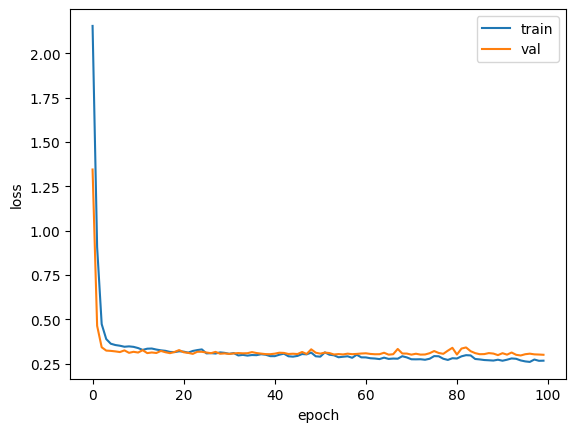

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [22]:
history = model.fit(train_scaled, train_target, epochs = 60, validation_data = (test_scaled, test_target))
model.summary()

Epoch 1/60
22/22 [==============================] - 0s 9ms/step - loss: 0.2643 - accuracy: 0.8978 - val_loss: 0.3023 - val_accuracy: 0.8667
Epoch 2/60
22/22 [==============================] - 0s 8ms/step - loss: 0.2676 - accuracy: 0.9007 - val_loss: 0.3269 - val_accuracy: 0.8889
Epoch 3/60
22/22 [==============================] - 0s 8ms/step - loss: 0.2961 - accuracy: 0.8815 - val_loss: 0.3039 - val_accuracy: 0.8756
Epoch 4/60
22/22 [==============================] - 0s 7ms/step - loss: 0.2901 - accuracy: 0.8844 - val_loss: 0.3297 - val_accuracy: 0.8667
Epoch 5/60
22/22 [==============================] - 0s 8ms/step - loss: 0.2766 - accuracy: 0.8889 - val_loss: 0.3198 - val_accuracy: 0.8711
Epoch 6/60
22/22 [==============================] - 0s 7ms/step - loss: 0.2785 - accuracy: 0.8874 - val_loss: 0.3061 - val_accuracy: 0.8756
Epoch 7/60
22/22 [==============================] - 0s 6ms/step - loss: 0.2668 - accuracy: 0.8978 - val_loss: 0.3113 - val_accuracy: 0.8667
Epoch 8/60
22/22 [==

In [23]:
model.evaluate(test_scaled, test_target)

8/8 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8756


[0.3121963143348694, 0.8755555748939514]